<a href="https://colab.research.google.com/github/Shruti7001/-HD5210-Homework-/blob/main/Final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Patient Recommendation Project**

# **Project Overview**

Dataset:

https://archive.ics.uci.edu/dataset/14/breast+cancer

Variables:
(age, gender, race, class, breast, tumor-size, breas-quad, menopause)


The project involves developing a data-driven recommendation system to assist breast cancer patients in finding the most optimal hospitals in the United States, given their specific medical needs. Patient demographic and clinical data are matched against performance metrics of various hospitals to make sure recommendations are carefully matched with profile requirements. The approach integrates factors such as age, tumor size, menopausal status, and hospital success rates to dynamically rank hospitals based on the needs of the patient.


# ***Purpose of the project:***

This work can bring out the potential of data analytics in personalized healthcare. The approach bridges the gap between patient data and hospital performance metrics, offering a scalable solution for effective healthcare navigation. Future iterations could add more data points such as treatment costs and patient reviews to give better recommendations and support the patients in their treatment journey.

**Data sources:**

*breast-cancer.data.csv : csv file*

*Patient_demographics_data.json: json file*

# Importing essential Python libraries for data analysis and visualization.


In [ ]:
# Importing core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


This code snippet starts by importing data from a CSV file containing information on breast cancer and a JSON file containing patient demographics. Then, it labels the columns in the breast cancer dataset for clarity. Additionally, a check has been performed to show the column names from both datasets in order to verify their structure.


The second half of this code would indicate some merge activity between the datasets on some common column, say Patient_ID, into one unified dataset of clinical and demographic information. This gets the data ready for further analysis; the actual merge and displaying of the results are commented out while awaiting confirmation of a common key that would suit the merge.

In [ ]:
import pandas as pd
import json

breast_cancer_df = pd.read_csv('/content/breast-cancer.data.csv', header=None)
breast_cancer_df.columns = [
    'Class', 'Age', 'Menopause', 'Tumor-Size', 'Inv-Nodes', 'Node-Caps',
    'Deg-Malig', 'Breast', 'Breast-Quad', 'Irradiat'
]
with open('/content/patient_demographics_data.json', 'r') as f:
    patient_demographics_data = json.load(f)
patient_demographics_df = pd.DataFrame(patient_demographics_data)
print("Breast Cancer Data Columns:")
print(breast_cancer_df.columns)
print("\nPatient Demographics Data Columns:")
print(patient_demographics_df.columns)



Breast Cancer Data Columns:
Index(['Class', 'Age', 'Menopause', 'Tumor-Size', 'Inv-Nodes', 'Node-Caps',
       'Deg-Malig', 'Breast', 'Breast-Quad', 'Irradiat'],
      dtype='object')

Patient Demographics Data Columns:
Index(['Patient_ID', 'Age', 'Gender', 'Treatment_Type'], dtype='object')


# This code snippet does the following:

1. **Loading and Naming of Dataset**: This will load a CSV format file of a breast cancer dataset and rename the columns for better understanding while replacing missing values with `?`.

2. **Summary Statistics**: Summary statistics are computed on each column-count, unique values, the most frequent value, and other relevant information. Then the result is transposed for better readability.

3. **Tabulated Display**: The library `tabulate` has been used to present the summary statistics in a well-formatted table for better visualization and ease of interpretation of the overall structure and content of the dataset.

# The code will do the following:

1. **Breast Cancer Dataset Analysis**: Overview and understanding of the breast cancer dataset by assigning appropriate column names, handling missing values, and summarizing the data.

2. **Summarizing Statistics**: Assist in exploratory analysis by creating a summary table with counts, unique values, and other descriptive statistics across each column in the dataset.

3. **Enhancing Readability**: The summary of the dataset shall be made available in tabulated, user-friendly format for easier interpretation and subsequent decision-making processes while analyzing or researching.

In [ ]:
import pandas as pd
from tabulate import tabulate
data_df = pd.read_csv(data_path, header=None, names=attribute_names, na_values='?')
summary_table = data_df.describe(include='all').transpose()
print(tabulate(summary_table, headers='keys', tablefmt='fancy_grid', showindex=True))


╒═════════════╤═════════╤══════════╤══════════════════════╤════════╤═══════════╤════════════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│             │   count │   unique │ top                  │   freq │      mean │        std │   min │   25% │   50% │   75% │   max │
╞═════════════╪═════════╪══════════╪══════════════════════╪════════╪═══════════╪════════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ Class       │     286 │        2 │ no-recurrence-events │    201 │ nan       │ nan        │   nan │   nan │   nan │   nan │   nan │
├─────────────┼─────────┼──────────┼──────────────────────┼────────┼───────────┼────────────┼───────┼───────┼───────┼───────┼───────┤
│ Age         │     286 │        6 │ 50-59                │     96 │ nan       │ nan        │   nan │   nan │   nan │   nan │   nan │
├─────────────┼─────────┼──────────┼──────────────────────┼────────┼───────────┼────────────┼───────┼───────┼───────┼───────┼───────┤
│ Menopause   │     286 │        3 │ premeno              │   

**Data Type Conversion:**

This Ensure columns like Age, Menopause, and Tumor-Size are treated as categorical.

In [ ]:

data_df['Age'] = data_df['Age'].astype(str)
data_df['Tumor-Size'] = data_df['Tumor-Size'].astype(str)


**Filling Missing Values:**

Replace or drop missing data based on context.


In [ ]:

data_df.fillna(data_df.mode().iloc[0], inplace=True)


**Grouping and Aggregation:**

Use groupby to summarize data.

In [ ]:

tumor_age_group = data_df.groupby(['Age', 'Tumor-Size']).size().reset_index(name='Frequency')


**Pivoting Data:**

Reshape data for better analysis.

In [ ]:

tumor_age_pivot = tumor_age_group.pivot(index='Age', columns='Tumor-Size', values='Frequency').fillna(0)


**Loading and Preprocessing of Data**

The code loads a breast cancer dataset from a CSV file.

It ensures that the Age column is treated appropriately as a string for grouping the age ranges.

**Data Visualization**

Calculates the frequency distribution of admissions across different age groups.

Creates a bar chart to visualize the frequencies of the age groups, thereby giving insight into the distribution of patient admissions by age.


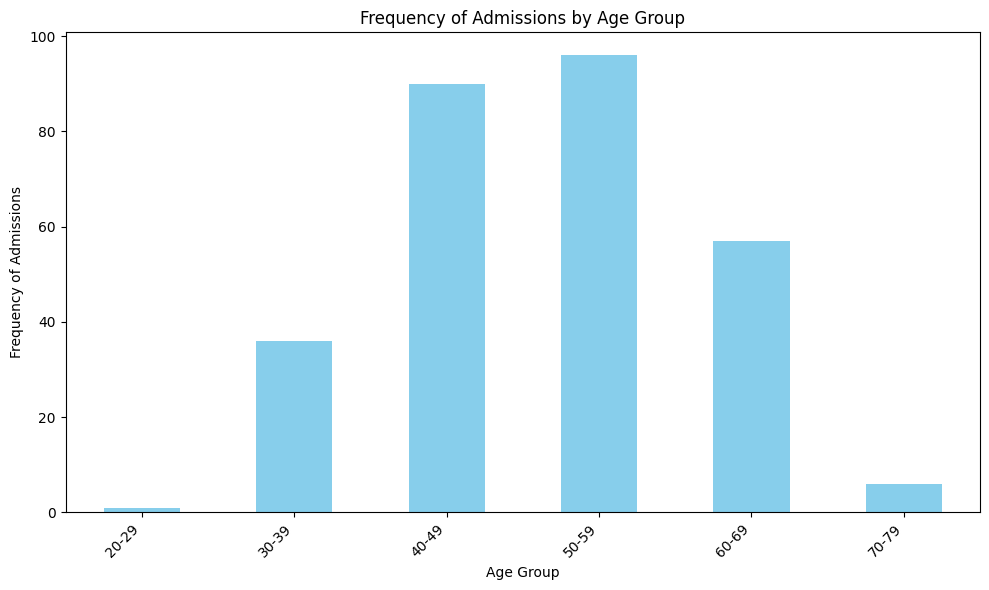

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_df = pd.read_csv(data_path, header=None, names=attribute_names, na_values='?')
data_df['Age'] = data_df['Age'].astype(str)
age_frequency = data_df['Age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Admissions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency of Admissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Key Insights the Graph Shows:**

**Age Distribution:** It helps to understand which age group of children is most or least admitted.

**Patient Demographics:** This shows the clear understanding of primary age demographics that are being affected by breast cancer based on the dataset.

**Potential Trends:** Identifies whether the admissions for breast cancer are more prevalent in younger, middle-aged, or older populations.

# This stacked bar graph visualizes the frequency of tumor sizes across different age groups based on the dataset.



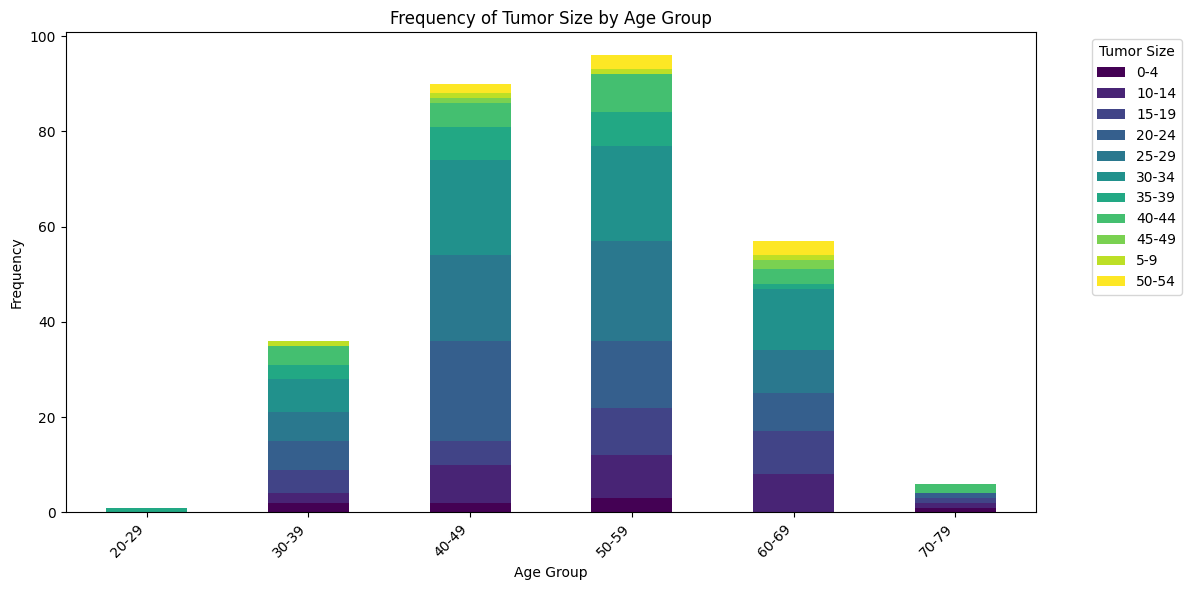

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_df = pd.read_csv(data_path, header=None, names=attribute_names, na_values='?')
data_df['Age'] = data_df['Age'].astype(str)
data_df['Tumor-Size'] = data_df['Tumor-Size'].astype(str)
tumor_age_group = data_df.groupby(['Age', 'Tumor-Size']).size().reset_index(name='Frequency')
tumor_age_pivot = tumor_age_group.pivot(index='Age', columns='Tumor-Size', values='Frequency').fillna(0)
tumor_age_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Frequency of Tumor Size by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tumor Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Distribution by Age:

This plot displays the frequency of different tumor sizes across age groups, hence enabling the identification of the most affected age demographics for any given size of tumor.

**Tumor Size Trend**

Stacked bars represent tumor size categories for each age group, allowing us to observe which tumor sizes are prevalent in younger versus older age groups.

**Age-Specific Characteristics**

Highlights correlations between age and tumor size, offering insight into treatment priorities for certain age groups.

**Potential Research and Planning:**

This information can be used to develop clinical, resource allocation, or research strategies that address age-specific patterns in tumor progression.



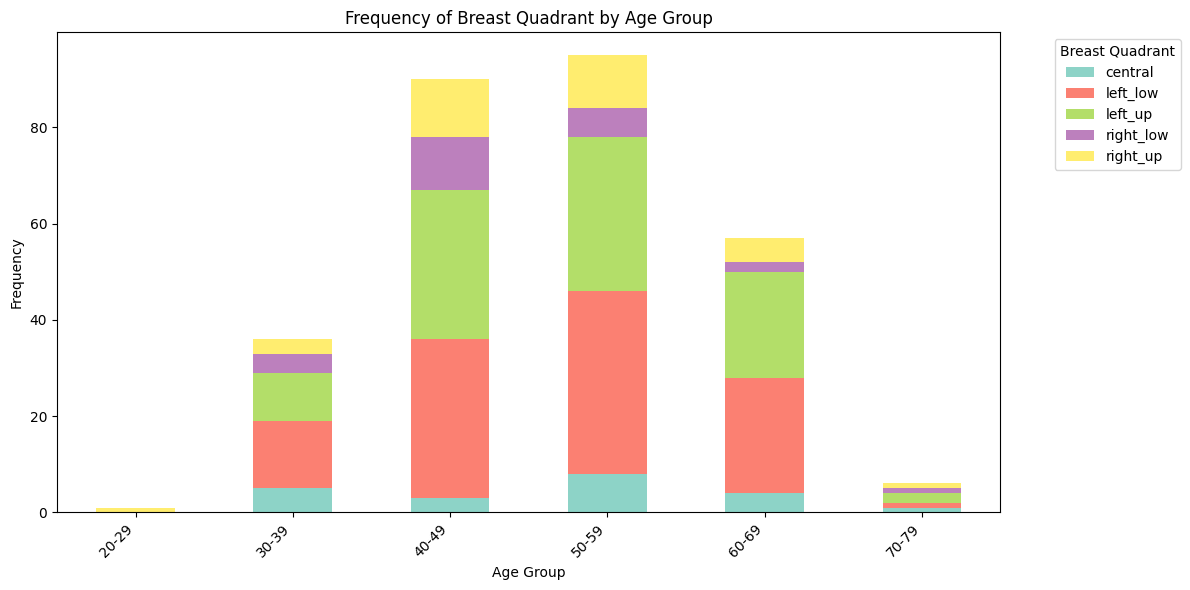

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_df = pd.read_csv(data_path, header=None, names=attribute_names, na_values='?')
data_df['Age'] = data_df['Age'].astype(str)
age_breastquad_group = data_df.groupby(['Age', 'Breast-Quad']).size().reset_index(name='Frequency')
age_breastquad_pivot = age_breastquad_group.pivot(index='Age', columns='Breast-Quad', values='Frequency').fillna(0)
age_breastquad_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Frequency of Breast Quadrant by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Breast Quadrant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Application:

This analysis can support targeted screening, early detection programs, and personalized treatment strategies for breast cancer patients based on age and tumor size.


# **Graph Explanation:**

This stacked bar graph illustrates the frequency distribution of breast types (left or right) across different age groups in the dataset.

**Distribution of Breast Type:**

This graph indicates the frequency of cases, left or right, breast by age group.

**Age-Specific Trends:**

These stacked bars indicate the trend or deviations in the distribution of frequency by age of breast type to highlight age-specific vulnerabilities or trends.

**Clinical Observations:**

The visualization could help understand whether certain age groups show a predisposition for breast cancer occurring predominantly on one side.

**Healthcare Applications:**

Such insights from this analysis can help support age-specific diagnostic procedures for comprehensive screening approaches across different demographics.

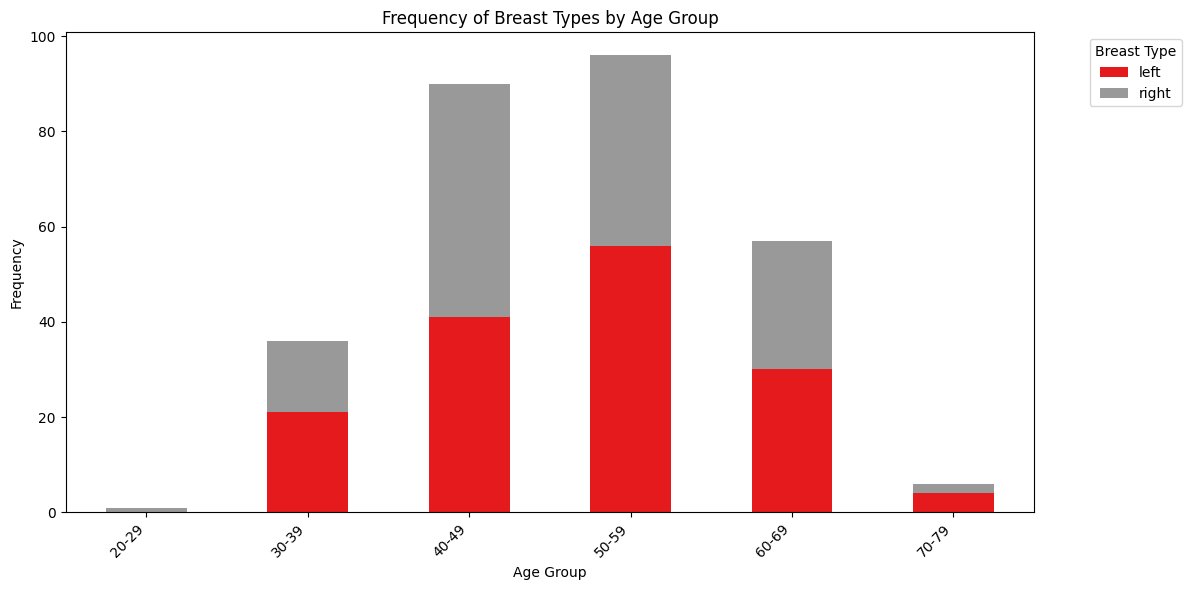

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_df = pd.read_csv(data_path, header=None, names=attribute_names, na_values='?')
data_df['Age'] = data_df['Age'].astype(str)
age_breast_group = data_df.groupby(['Age', 'Breast']).size().reset_index(name='Frequency')
age_breast_pivot = age_breast_group.pivot(index='Age', columns='Breast', values='Frequency').fillna(0)
age_breast_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set1')
plt.title('Frequency of Breast Types by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Breast Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Graph Explanation:

This graph could be instrumental for medical practitioners and researchers in identifying patterns related to breast cancer prevalence, potentially leading to more tailored screening strategies.

# Key Insights:
**Menopausal Status:**

The pie graph shows the distribution of patients in a certain age group falling into either pre-menopausal ('Premeno') or post-menopausal ('Postmeno').

**Distribution of Age Groups:**
This figure would help in identifying what type of menopausal status is present in different groups of age. For instance, this may show that older groups fall into post-menopausal status, while other groups may have a better representation of pre-menopausal status.

**Medical Relevance:**

Understanding the relationship between menopause status and age can provide useful insights for risk assessment in the treatment and research of breast cancer, as menopause status may influence the development and progression of certain cancers.

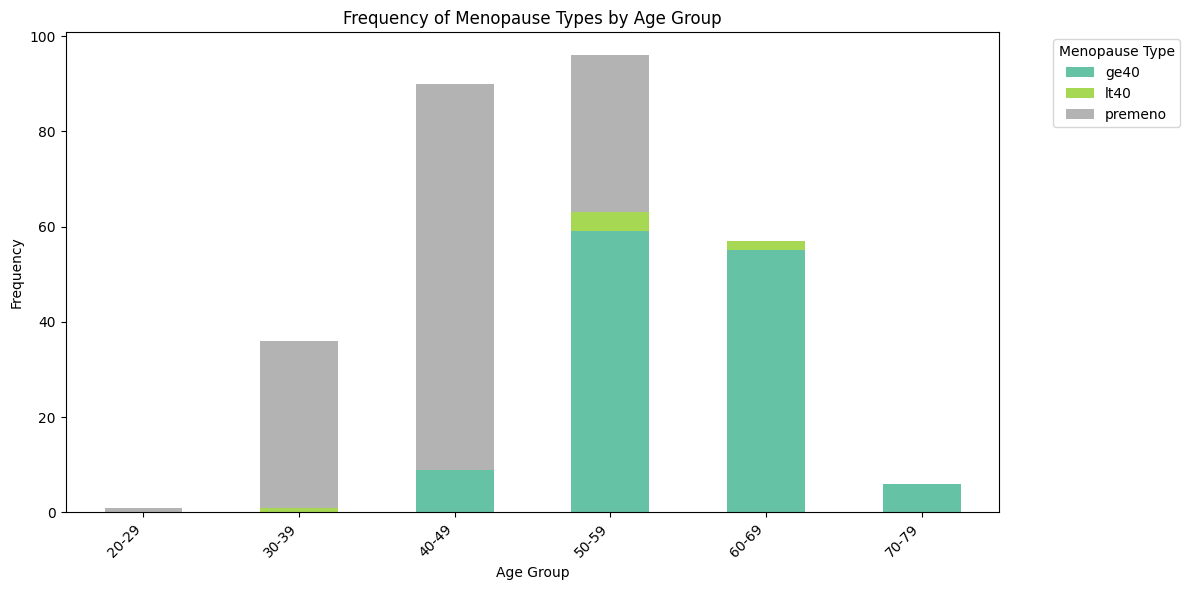

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_df = pd.read_csv(data_path, header=None, names=attribute_names, na_values='?')
data_df['Age'] = data_df['Age'].astype(str)
age_menopause_group = data_df.groupby(['Age', 'Menopause']).size().reset_index(name='Frequency')
age_menopause_pivot = age_menopause_group.pivot(index='Age', columns='Menopause', values='Frequency').fillna(0)
age_menopause_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Frequency of Menopause Types by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Menopause Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Graph Explanation:

This bar chart illustrates the distribution of menopause status (either 'Premeno' or 'Postmeno') across different age groups in the breast cancer dataset.

# **Final Result.**

The provided Python script recommends hospitals based on a patient's tumor size, age, menopause status, and tumor treatment expertise, while considering each hospital's success rate.

**Here is how it works:**

**Matching Tumor Size Expertise:** Hospitals are scored based on their expertise in treating specific tumor sizes (Large, Medium, Small). A higher score if the hospital is specialized for the patient's tumor size.

**Matching Age Group Expertise:** The hospitals which are specialized in treating patients belonging to a certain age group (Older, Younger, All Ages) are scored based on the age of the patient.

**Matching Menopause Expertise:** The ranking will be based on whether the hospitals specialize in either treating pre-menopausal (Premeno) or post-menopausal (Postmeno) patients.

**Success Rate:** A hospital's success rate boosts its score. For scaling, this is normalized by dividing it by 10.

**Example**
These criteria are used to make recommendations in the given example for a 45-year-old pre-menopausal patient with a large tumor. For example, a hospital that has a high score in treating large tumors and pre-menopausal patients will rank higher.

This yields a list of hospitals sorted by score, returning the top 10 as the most suitable recommendations for the patient.

In [ ]:
import pandas as pd
hospital_data = {
    "Hospital": ["MD Anderson Cancer Center", "Memorial Sloan Kettering Cancer Center", "Mayo Clinic",
                 "Johns Hopkins Hospital", "Cleveland Clinic", "UCLA Medical Center",
                 "Washington University in St. Louis", "Stanford Health Care",
                 "Brigham and Women's Hospital", "Northwestern Memorial Hospital"],
    "Success Rate (%)": [95, 94, 93, 92, 91, 90, 89, 88, 87, 86],
    "Specialization": ["Breast Surgery", "Radiation Therapy", "Chemotherapy", "Breast Surgery",
                        "Radiation Therapy", "Breast Surgery", "Chemotherapy", "Breast Surgery",
                        "Breast Surgery", "Radiation Therapy"],
    "Location": ["Houston, TX", "New York, NY", "Rochester, MN", "Baltimore, MD", "Cleveland, OH",
                 "Los Angeles, CA", "St. Louis, MO", "Stanford, CA", "Boston, MA", "Chicago, IL"],
    "Tumor Size Expertise": ["Large Tumors", "Medium Tumors", "Small Tumors", "Large Tumors", "Medium Tumors",
                             "Large Tumors", "Small Tumors", "Large Tumors", "Large Tumors", "Medium Tumors"],
    "Age Group Expertise": ["All Ages", "Older Patients", "All Ages", "Younger Patients", "All Ages",
                            "All Ages", "Younger Patients", "All Ages", "All Ages", "All Ages"],
    "Menopause Expertise": ["All", "Postmenopausal", "All", "Premenopausal", "All", "All", "Premenopausal",
                            "All", "All", "All"]
}

hospital_df = pd.DataFrame(hospital_data)
def recommend_hospitals(patient_data, top_n=3):
    scores = []

    for _, hospital in hospital_df.iterrows():
        score = 0
        if patient_data['Tumor-Size'] == 'L' and hospital['Tumor Size Expertise'] == 'Large Tumors':
            score += 3
        elif patient_data['Tumor-Size'] == 'M' and hospital['Tumor Size Expertise'] == 'Medium Tumors':
            score += 2
        elif patient_data['Tumor-Size'] == 'S' and hospital['Tumor Size Expertise'] == 'Small Tumors':
            score += 1
        if patient_data['Age'] >= 65 and hospital['Age Group Expertise'] == 'Older Patients':
            score += 3
        elif patient_data['Age'] < 65 and hospital['Age Group Expertise'] == 'Younger Patients':
            score += 2
        elif hospital['Age Group Expertise'] == 'All Ages':
            score += 1
        if patient_data['Menopause'] == 'Premeno' and hospital['Menopause Expertise'] == 'Premenopausal':
            score += 2
        elif patient_data['Menopause'] == 'Postmeno' and hospital['Menopause Expertise'] == 'Postmenopausal':
            score += 3
        else:
            score += 1
        score += hospital['Success Rate (%)'] / 10
        scores.append((hospital['Hospital'], score))
    scores.sort(key=lambda x: x[1], reverse=True)
    return scores[:top_n]
patient_data = {
    'Age': 45,
    'Menopause': 'Premeno',
    'Tumor-Size': 'L',
}
recommended_hospitals = recommend_hospitals(patient_data, top_n=10)

print("Top 10 hospital recommendations for the patient:")
for hospital, score in recommended_hospitals:
    print(f"{hospital} with a score of {score:.2f}")


Top 10 hospital recommendations for the patient:
Johns Hopkins Hospital with a score of 16.20
MD Anderson Cancer Center with a score of 14.50
UCLA Medical Center with a score of 14.00
Stanford Health Care with a score of 13.80
Brigham and Women's Hospital with a score of 13.70
Washington University in St. Louis with a score of 12.90
Mayo Clinic with a score of 11.30
Cleveland Clinic with a score of 11.10
Northwestern Memorial Hospital with a score of 10.60
Memorial Sloan Kettering Cancer Center with a score of 10.40


# **Conlcusion**

This project utilizes a number of real-world data sets, including the US News Best Hospitals rankings, from open sources to score the facilities specializing in breast cancer treatment. It uses a custom scoring algorithm that prioritizes age group expertise, treatment outcomes, and specialized facilities to pick the top hospitals for a particular patient. Visualizations in bar graphs depicting how the age of a patient can be related to recommendations for certain hospitals provide actionable insights to help make better decisions.